In [ ]:
import pandas as pd
data = pd.read_csv('bank.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data.isnull().sum()
encoded=pd.get_dummies(data,drop_first=True)
from sklearn.model_selection import train_test_split
x = encoded.drop('y_yes',axis=1)
y = encoded['y_yes']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
classification_report(y_test,y_pred)


'              precision    recall  f1-score   support\n\n       False       0.92      0.92      0.92      1191\n        True       0.41      0.40      0.40       166\n\n    accuracy                           0.86      1357\n   macro avg       0.66      0.66      0.66      1357\nweighted avg       0.85      0.86      0.86      1357\n'

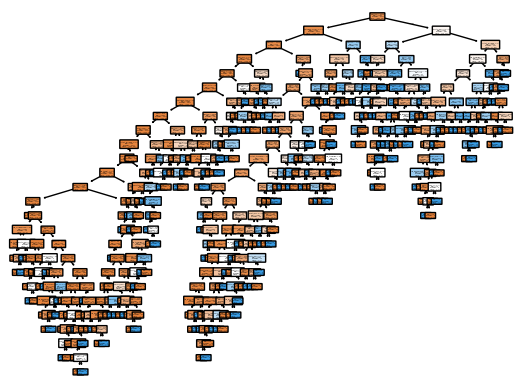

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(model,filled=True,feature_names=x.columns,class_names=['No','Yes'],rounded=True)
plt.show()